[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 0.0000


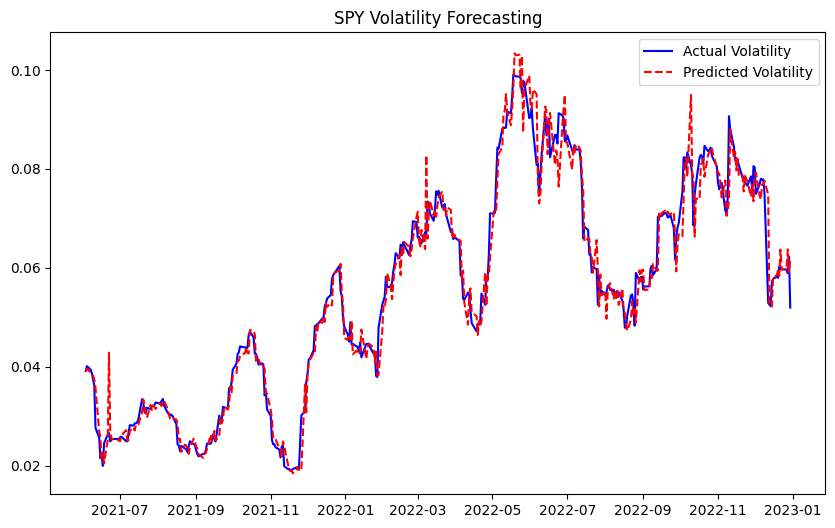

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Download historical data (e.g., S&P 500 ETF - SPY)
ticker = "SPY"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Calculate rolling volatility (Standard deviation of daily returns)
window_size = 21  # 21 trading days in a month
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std() * np.sqrt(window_size)

# Drop NaN values (due to rolling window)
data.dropna(inplace=True)

# Feature Engineering: Add features like lagged returns, volatility, and other technical indicators
data['Lag_1_Return'] = data['Daily_Return'].shift(1)
data['Lag_1_Volatility'] = data['Volatility'].shift(1)

# Drop NaN values from lagged features
data.dropna(inplace=True)

# Feature Matrix (X) and Target Variable (y)
X = data[['Lag_1_Return', 'Lag_1_Volatility']]
y = data['Volatility']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot actual vs predicted volatility
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', linestyle='--')
plt.title(f'{ticker} Volatility Forecasting')
plt.legend()
plt.show()



In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0039
Mean Absolute Error (MAE): 0.0025
R-squared (R2): 0.9675
